In [1]:
import warnings
warnings.filterwarnings("ignore")

## Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

## Скачиваем данные

In [3]:
X = pd.read_csv('./market_data_train.csv')
X

,symbol,time,open,high,low,close,market_cap,n_trades,volume,taker_buy_volume
0,1INCH,2020-12-25 06:00:00,0.2000,3.0885,0.2000,2.5826,6.707592e+07,48768,3.553052e+07,1.724763e+07
1,1INCH,2020-12-25 07:00:00,2.5824,2.6900,2.2249,2.5059,6.508385e+07,31099,2.244087e+07,9.861481e+06
2,1INCH,2020-12-25 08:00:00,2.5152,2.8870,2.3609,2.6237,6.814338e+07,33001,2.130043e+07,1.160785e+07
3,1INCH,2020-12-25 09:00:00,2.6318,2.8247,2.4650,2.6134,6.787587e+07,30459,1.749181e+07,9.087566e+06
4,1INCH,2020-12-25 10:00:00,2.6104,2.7498,2.5629,2.6365,6.847583e+07,21023,9.919400e+06,4.798067e+06
...,...,...,...,...,...,...,...,...,...,...
2235079,ZRX,2021-05-31 16:00:00,0.9755,1.0160,0.9731,1.0149,8.544659e+08,1745,5.283764e+05,2.847624e+05
2235080,ZRX,2021-05-31 17:00:00,1.0147,1.0200,0.9871,1.0047,8.458783e+08,1451,3.980687e+05,1.617346e+05
2235081,ZRX,2021-05-31 18:00:00,1.0064,1.0077,0.9830,0.9884,8.321549e+08,894,2.268356e+05,7.276305e+04
2235082,ZRX,2021-05-31 19:00:00,0.9889,0.9905,0.9827,0.9865,8.305553e+08,346,7.615435e+04,3.804757e+04


In [4]:
X = X[X.symbol == '1INCH']
X['close_pct'] = X['close'].pct_change(3)
# создаем вспомогательный столбец pnl_without_cumsum
X['pnl_without_cumsum'] = 0
for i in range (1, len(X)):
    a = float(X['close'][X.index == i])
    b = float(X['close'][X.index == i-1])
    X['pnl_without_cumsum'][X.index == i] = a - b
X['pnl'] = X['pnl_without_cumsum'].cumsum()
X = X.drop('pnl_without_cumsum', axis = 1)

In [5]:
X

,symbol,time,open,high,low,close,market_cap,n_trades,volume,taker_buy_volume,close_pct,pnl
0,1INCH,2020-12-25 06:00:00,0.2000,3.0885,0.2000,2.5826,6.707592e+07,48768,3.553052e+07,1.724763e+07,NaN,0.0000
1,1INCH,2020-12-25 07:00:00,2.5824,2.6900,2.2249,2.5059,6.508385e+07,31099,2.244087e+07,9.861481e+06,NaN,-0.0767
2,1INCH,2020-12-25 08:00:00,2.5152,2.8870,2.3609,2.6237,6.814338e+07,33001,2.130043e+07,1.160785e+07,NaN,0.0411
3,1INCH,2020-12-25 09:00:00,2.6318,2.8247,2.4650,2.6134,6.787587e+07,30459,1.749181e+07,9.087566e+06,0.011926,0.0308
4,1INCH,2020-12-25 10:00:00,2.6104,2.7498,2.5629,2.6365,6.847583e+07,21023,9.919400e+06,4.798067e+06,0.052117,0.0539
...,...,...,...,...,...,...,...,...,...,...,...,...
3770,1INCH,2021-05-31 16:00:00,3.1322,3.2044,3.1302,3.2010,5.363965e+08,5766,1.235457e+06,6.551575e+05,0.030652,0.6184
3771,1INCH,2021-05-31 17:00:00,3.2026,3.2928,3.1824,3.2059,5.372176e+08,9995,2.456081e+06,1.294965e+06,0.033228,0.6233
3772,1INCH,2021-05-31 18:00:00,3.2062,3.2145,3.1097,3.1545,5.286044e+08,5315,1.030900e+06,5.048614e+05,0.006959,0.5719
3773,1INCH,2021-05-31 19:00:00,3.1545,3.1595,3.1057,3.1306,5.245995e+08,2244,3.915990e+05,2.102178e+05,-0.021993,0.5480


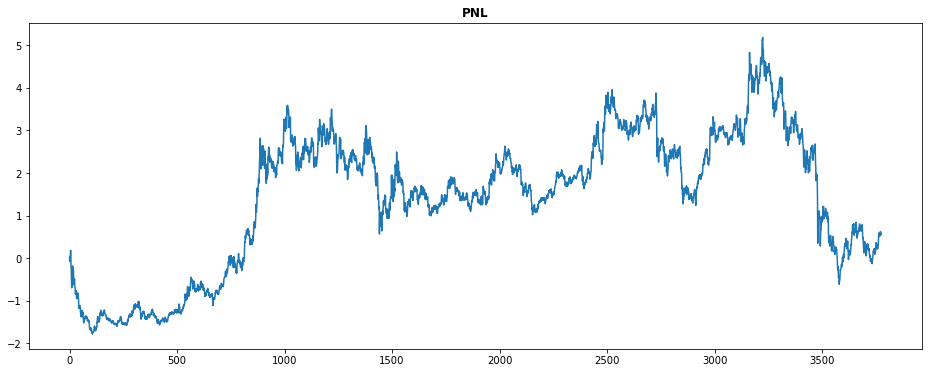

In [6]:
X['pnl'].plot(figsize=(16, 6))
plt.title("PNL", weight="bold")

plt.show()

In [7]:
# Хотим посмотреть 12 фичей: для 4х типов цен и 3х видов параметров (всего 12)
price_type = ['open', 'high', 'low', 'close']
sma_hours = [3, 12, 24]
for p in price_type:
    for h in sma_hours:
        name = 'f_' + p + str(h)
        data = X[p]
        rolling_mean = data.rolling(window = h).mean()
        X[name] = X[p]/rolling_mean - 1
X

,symbol,time,open,high,low,close,market_cap,n_trades,volume,taker_buy_volume,...,f_open24,f_high3,f_high12,f_high24,f_low3,f_low12,f_low24,f_close3,f_close12,f_close24
0,1INCH,2020-12-25 06:00:00,0.2000,3.0885,0.2000,2.5826,6.707592e+07,48768,3.553052e+07,1.724763e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1INCH,2020-12-25 07:00:00,2.5824,2.6900,2.2249,2.5059,6.508385e+07,31099,2.244087e+07,9.861481e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1INCH,2020-12-25 08:00:00,2.5152,2.8870,2.3609,2.6237,6.814338e+07,33001,2.130043e+07,1.160785e+07,...,NaN,-0.000519,NaN,NaN,0.479941,NaN,NaN,0.020604,NaN,NaN
3,1INCH,2020-12-25 09:00:00,2.6318,2.8247,2.4650,2.6134,6.787587e+07,30459,1.749181e+07,9.087566e+06,...,NaN,0.008617,NaN,NaN,0.048817,NaN,NaN,0.012553,NaN,NaN
4,1INCH,2020-12-25 10:00:00,2.6104,2.7498,2.5629,2.6365,6.847583e+07,21023,9.919400e+06,4.798067e+06,...,NaN,-0.025066,NaN,NaN,0.040588,NaN,NaN,0.004560,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3770,1INCH,2021-05-31 16:00:00,3.1322,3.2044,3.1302,3.2010,5.363965e+08,5766,1.235457e+06,6.551575e+05,...,0.064811,0.005281,0.029818,0.067131,0.016728,0.042230,0.077109,0.017644,0.041551,0.080850
3771,1INCH,2021-05-31 17:00:00,3.2026,3.2928,3.1824,3.2059,5.372176e+08,9995,2.456081e+06,1.294965e+06,...,0.081398,0.020601,0.045234,0.088823,0.022534,0.046928,0.087515,0.008187,0.032432,0.075395
3772,1INCH,2021-05-31 18:00:00,3.2062,3.2145,3.1097,3.1545,5.286044e+08,5315,1.030900e+06,5.048614e+05,...,0.075499,-0.007022,0.011613,0.056505,-0.009891,0.014192,0.057017,-0.010239,0.007887,0.052201
3773,1INCH,2021-05-31 19:00:00,3.1545,3.1595,3.1057,3.1306,5.245995e+08,2244,3.915990e+05,2.102178e+05,...,0.052169,-0.019479,-0.010701,0.034148,-0.008587,0.006180,0.050302,-0.010452,-0.004302,0.040131


In [8]:
pearsoncorr = X.corr(method='pearson')
pearsoncorr

,open,high,low,close,market_cap,n_trades,volume,taker_buy_volume,close_pct,pnl,...,f_open24,f_high3,f_high12,f_high24,f_low3,f_low12,f_low24,f_close3,f_close12,f_close24
open,1.000000,0.998664,0.998663,0.997913,0.964356,0.248727,0.275142,0.264288,0.004001,0.997913,...,0.081698,0.011303,0.052477,0.075236,-0.003405,0.044030,0.067936,-0.015255,0.036102,0.062644
high,0.998664,1.000000,0.997850,0.999033,0.963177,0.274469,0.302783,0.294096,0.018080,0.999033,...,0.081498,0.030352,0.062946,0.083733,0.007682,0.048978,0.071992,0.007564,0.048470,0.072185
low,0.998663,0.997850,1.000000,0.998752,0.965772,0.227525,0.257846,0.251501,0.025467,0.998752,...,0.084391,0.027100,0.062178,0.082189,0.025145,0.064391,0.083266,0.015593,0.055706,0.076981
close,0.997913,0.999033,0.998752,1.000000,0.965378,0.253626,0.283795,0.277841,0.033619,1.000000,...,0.080393,0.034896,0.063982,0.083763,0.022740,0.057881,0.078272,0.032880,0.061804,0.081068
market_cap,0.964356,0.963177,0.965772,0.965378,1.000000,0.194885,0.195603,0.191826,0.013994,0.965378,...,0.032594,0.019848,0.032454,0.036401,0.003942,0.026021,0.030445,0.018162,0.029032,0.032806
n_trades,0.248727,0.274469,0.227525,0.253626,0.194885,1.000000,0.954200,0.937278,0.048336,0.253626,...,0.122595,0.146316,0.173454,0.200140,-0.057660,-0.022256,0.037134,0.023824,0.083017,0.126776
volume,0.275142,0.302783,0.257846,0.283795,0.195603,0.954200,1.000000,0.988419,0.103255,0.283795,...,0.187160,0.191761,0.229754,0.262998,0.012739,0.052160,0.116689,0.076660,0.149810,0.198563
taker_buy_volume,0.264288,0.294096,0.251501,0.277841,0.191826,0.937278,0.988419,1.000000,0.163360,0.277841,...,0.201837,0.250327,0.269235,0.293242,0.077313,0.100974,0.154244,0.155903,0.206485,0.242000
close_pct,0.004001,0.018080,0.025467,0.033619,0.013994,0.048336,0.103255,0.163360,1.000000,0.033619,...,0.391595,0.812750,0.633048,0.484965,0.778819,0.657816,0.513995,0.763446,0.751938,0.576462
pnl,0.997913,0.999033,0.998752,1.000000,0.965378,0.253626,0.283795,0.277841,0.033619,1.000000,...,0.080393,0.034896,0.063982,0.083763,0.022740,0.057881,0.078272,0.032880,0.061804,0.081068


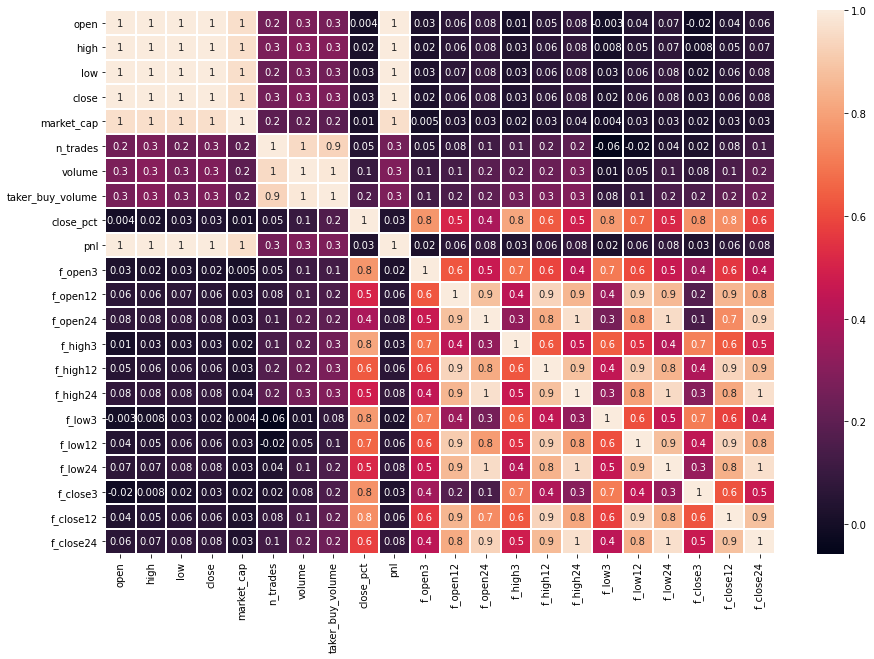

In [9]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
#             cmap='RdBu_r',
            annot=True,
            linewidth=1,
            fmt='.1g')